In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
NewCity = pd.read_csv("data/city_data.csv") 
NewRides = pd.read_csv("data/ride_data.csv") 

# Combine the data into a single dataset
AllData = pd.merge(NewRides, NewCity, on="city", how="left")

# Display the data table for preview
AllData.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

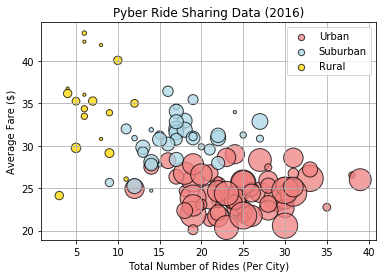

Text(42,37,'Note:')

In [11]:
# Obtain the x and y coordinates for each of the three city types
AvgFares = AllData["fare"].groupby(AllData["city"]).mean()
AvgFaresDF = pd.DataFrame(AvgFares)

NumRides = AllData["city"].groupby(AllData["city"]).count()
NumRides = NumRides.rename("Rides") 
NumRidesDF = pd.DataFrame(NumRides)
NumRidesDF.head()

PlotPyber = pd.merge(NumRidesDF, AvgFaresDF, on="city", how="inner")
PlotPyber = PlotPyber.rename(columns={"Rides":"Number of Rides", "fare":"Average Fare"})
PlotPyber = pd.merge(PlotPyber, NewCity, on="city", how="left")

x_axis = np.arange(0,PlotPyber["Number of Rides"].max(),1)

PlotUrban = PlotPyber.loc[PlotPyber["type"]=="Urban",:]
PlotRural = PlotPyber.loc[PlotPyber["type"]=="Rural",:]
PlotSuburb = PlotPyber.loc[PlotPyber["type"]=="Suburban",:]

#Merge NewCity Type and Driver Count into PlotPyber

# Build the scatter plots for each city types

Urban = plt.scatter(PlotUrban["Number of Rides"], PlotUrban["Average Fare"], facecolors = "lightcoral", edgecolors = "black", 
                    s = PlotUrban["driver_count"]*10, alpha = 0.75, label = "Urban")

Rural = plt.scatter(PlotRural["Number of Rides"], PlotRural["Average Fare"], facecolors = "gold", edgecolors = "black", 
                    s = PlotRural["driver_count"]*10, alpha = 0.75, label = "Rural")

Suburban = plt.scatter(PlotSuburb["Number of Rides"], PlotSuburb["Average Fare"], facecolors = "lightblue", edgecolors = "black", 
                       s = PlotSuburb["driver_count"]*10, alpha = 0.75, label = "Suburban")

# Incorporate the other graph properties

plt.grid()
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

# Create a legend
#plt.legend(PlotPyber["type"].unique(), loc="best")
leg1 = plt.legend(handles=[Urban, Suburban, Rural], loc = "best")
leg1.legendHandles[0]._sizes = [40]
leg1.legendHandles[1]._sizes = [40]
leg1.legendHandles[2]._sizes = [40]
plt.show()

# Incorporate a text label regarding circle size
plt.text(42,35,"Circle size correlates with driver count per city")
plt.text(42,37,"Note:")

# Save Figure


In [7]:

# Show plot
plt.show()

## Total Fares by City Type

([<matplotlib.patches.Wedge at 0x29177776d68>,
 [Text(0.723777,0.957156,'Urban'),
  Text(-0.834653,-0.716488,'Suburban'),
  Text(0.335155,-1.0477,'Rural')],
 [Text(0.422203,0.558341,'62.7%'),
  Text(-0.455265,-0.390811,'30.5%'),
  Text(0.182812,-0.571472,'6.8%')])

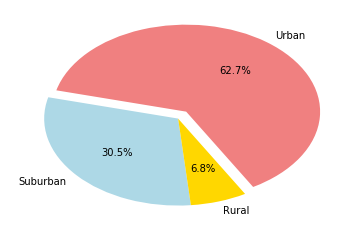

In [14]:
# Calculate Type Percents
FarePct = AllData.groupby("type").sum()
FarePct = FarePct.sort_values(["fare"],ascending=False)

# Build Pie Chart
plt.pie(FarePct["fare"], colors=["lightcoral","lightblue","gold"], labels=FarePct.index, autopct = "%1.1f%%",
       startangle = 300, explode = (0.1,0,0))

# Save Figure


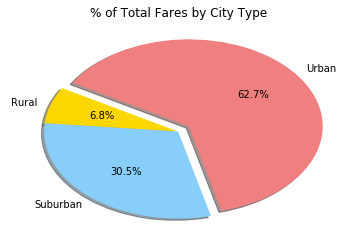

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

([<matplotlib.patches.Wedge at 0x2b0158b9080>,
 [Text(1.0046,0.656338,'Urban'),
  Text(-1.00735,-0.441865,'Suburban'),
  Text(-0.181054,-1.085,'Rural')],
 [Text(0.586017,0.382864,'68.4%'),
  Text(-0.549464,-0.241017,'26.3%'),
  Text(-0.0987567,-0.591817,'5.3%')])

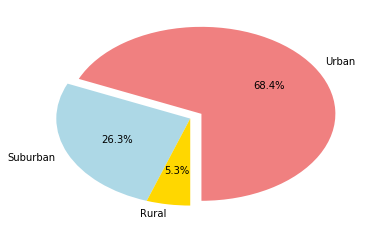

In [63]:
# Calculate Ride Percents
RidePct = AllData["type"].value_counts()


# Build Pie Chart
plt.pie(RidePct, colors=["lightcoral","lightblue","gold"], labels=FarePct.index, autopct = "%1.1f%%",
       startangle = 270, explode = (0.1,0,0))

# Save Figure


In [11]:
# Show Figure
plt.show()

## Total Drivers by City Type

([<matplotlib.patches.Wedge at 0x2b01592a400>,
 [Text(0.975593,0.698726,'Urban'),
  Text(-0.94399,-0.564698,'Suburban'),
  Text(-0.460046,-0.999178,'Rural')],
 [Text(0.569096,0.40759,'80.9%'),
  Text(-0.514903,-0.308017,'16.5%'),
  Text(-0.250934,-0.545006,'2.6%')])

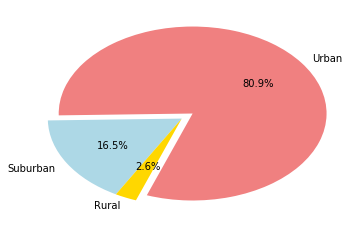

In [65]:
# Calculate Driver Percents
DriverPct = NewCity.groupby("type").sum()
DriverPct = DriverPct.sort_values(["driver_count"],ascending=False)
#print(NewCity["driver_count"])

# Build Pie Charts
plt.pie(DriverPct["driver_count"], colors=["lightcoral","lightblue","gold"], labels=DriverPct.index, autopct = "%1.1f%%",
       startangle = 250, explode = (0.1,0,0))

# Save Figure


In [47]:
# Show Figure
plt.show()